In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
import nltk 
from nltk.corpus import stopwords
import os

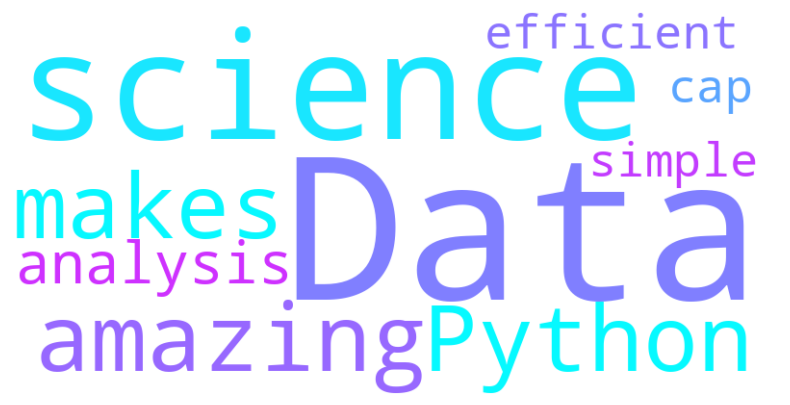

In [26]:
dummy_text = 'Data science is amazing. Python makes data analysis simple and efficient. No cap.'

# Create the wordcloud object
wordcloud_dummy = WordCloud(width = 800,
                           height = 400,
                           colormap='cool',
                           background_color = 'white').generate(dummy_text)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dummy, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [27]:
data = pd.read_csv('/kaggle/input/tweet-med-schools/Output Data [Med]/103_NursingUSD_med_2010_2022.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

In [28]:
data['Year'][0]

2022

## Word Cloud for Single University

In [29]:
def create_wordcloud_by_years(tweets, start_year, end_year, CUSTOM_STOPWORDS, dei_keywords,
                           university_name, min_freq=1, max_freq=100, max_words=100):
   """
   Create a wordcloud filtered by years and DEI keywords for a specific university
   
   Added Parameters:
   ----------------
   university_name : str
       Name of the university to include in plot title
   """
   
   if start_year is not None and end_year is not None:
       mask = tweets['Year'].between(start_year, end_year)
       filtered_tweets = tweets[mask]
       title_suffix = f"({start_year}-{end_year})"
   else:
       filtered_tweets = tweets
       title_suffix = "(All Years)"
   
   if filtered_tweets.empty:
       print(f"No tweets found for {university_name} {title_suffix}.")
       return None
   
   all_tweets = ' '.join(filtered_tweets['Processed Tweet'].values.astype(str))
   word_freq = Counter(all_tweets.split())
   
   filtered_words = {word: freq for word, freq in word_freq.items() 
                    if min_freq <= freq <= max_freq and word.lower() in [kw.lower() for kw in dei_keywords]}
   
   if not filtered_words:
       print(f"No DEI-related words found for {university_name} {title_suffix}.")
       return None
   
   filtered_text = ' '.join([word + ' ' * freq for word, freq in filtered_words.items()])
   
   wordcloud = WordCloud(
       stopwords=CUSTOM_STOPWORDS,
       width=1000, height=500,
       background_color='white',
       colormap='viridis',
       max_words=max_words
   ).generate(filtered_text)
   
   plt.figure(figsize=(10, 5))
   plt.imshow(wordcloud, interpolation='bilinear')
   plt.axis("off")
   
   plt.title(f'DEI Wordcloud for {university_name} {title_suffix}\n', 
            fontsize=12)
   plt.show()
   
   return dict(sorted(filtered_words.items(), key=lambda x: x[1], reverse=True))

In [30]:
uni_law_tweets = data['Tweet']
# text = ' '.join(uni_law_tweets)


In [31]:
dei_keywords = ['women', 'genderpaygap', 'governance', 'dominicanamerican', 'limitedincome', 'languages', 'sexually', 'racialinjustice', 'anti-racism', 'afrolatinidad', 'restorative justice', 'immigrantheritagemonth', 'economic justice', 'urdu', 'antichinese', 'sexspecific', 'iranians', 'chicanoshispanics', 'prejudice', 'blacklives', 'nonunion', 'historicaaging', 'minorityhealthmonth', 'deconstructs', 'decolonization', 'muslimchristian', 'biased', 'transoral', 'opportunity', 'ecuadorians', 'ideologically', 'african', 'refugiados', 'jiliang', 'blacktechtwitter', 'racialdisparities', 'vaccineequity', 'unionized', 'advocacy', 'antiracists', 'nonjewish', 'disabilityawarenessmonth', 'gays', 'disenfranchising', 'intersectionality', 'unapologeticexcellence', 'globaldiversityawarenessmonth', 'eurocentric', 'portugueseamerican', 'microaggression', 'asylumseeking', 'latina', 'blackbusinessleaders', 'inequitable', 'ddeaf', 'unity', 'Indigenous', 'policing', 'aboriginal', 'social change', 'picket', 'autocratic', 'equity-driven', 'lgbtqowned', 'pathtoequity', 'unconscious bias', 'LGBTQ+ rights', 'blackexcellence', 'gender equality', 'adultification', 'stopandfrisk', 'maternalchild', 'racialreckoning', 'genderbasedviolence', 'homeless', 'celebratediversitymonth', 'teamlatina', 'disability inclusion', 'actforinclusion', 'latinamerican', 'voterintimidation', 'blackgirlmagic', 'morehousemvpday', 'lowincome', 'minoritymentalhealth', 'sexist', 'ethnohistory', 'systemic racism', 'césarchávezday', 'multisport', 'freedom', 'marginalisation', 'ethinicity', 'lgbtqfocused', 'racism', 'beinclusive', 'marginalization', 'firstgen', 'blackbird', 'othering', 'genocide', 'blackstudent', 'unethically', 'vulnerability', 'blackincancer', 'massincarceration', 'prejudicial', 'empowerment', 'intersectionalism', 'judeochristian', 'civil rights', 'sexual', 'votersuppression', 'objectification', 'womxnintech', 'libertad', 'equal access', 'interkorean', 'transgression', 'systemic', 'systemicracism', 'blackamericans', 'antiracism', 'blackincardioweek', 'decriminalize', 'antiviolence', 'mainstreaming', 'equityfree', 'equitys', 'exclusionary', 'racists', 'lesseducated', 'antiamerican', 'blackhistoryisamericanhistory', 'womeninconstruction', 'minoritiesinstem', 'genocidal', 'decolonized', 'equityandinclusion', 'vulnerabilidad', 'empathy', 'barrier', 'sectarianism', 'lgbta', 'sociallyconscious', 'femaleowned', 'microagression', 'wicsfiu', 'xenophobia', 'eoevetdisability', 'metis', 'underserved', 'latinoamericana', 'afflictions', 'internationalwomeninscienceday', 'just', 'racialbias', 'sexualassault', 'prochoice', 'césarchávez', 'nonhbcu', 'aapi', 'underbanked', 'internalized', 'undocumented', 'biases', 'nonwhiteowned', 'immigrant', 'germanamerican', 'hbcuchallenge', 'codeblackri', 'socialinjustice', 'indianlaw', 'abled', 'community engagement', 'privilege', 'transición', 'inclusionandeducation', 'gender expression', 'antihomophobia', 'sunypride', 'americanpacific', 'lesbians', 'backgrounds', 'blackhealthmatters', 'immigrants', 'matriarchs', 'latino', 'unhstayhomecoming', 'supremacist', 'biwoc', 'historically', 'whitewashed', 'sexism', 'blackjewish', 'equitycenteredengineering', 'social inequality', 'hbcumade', 'kujichagulia', 'yemeni', 'cultural', 'dignity', 'womxnshistorymonth', 'nonenglishspeaking', 'antihate', 'stigma', 'racialhealing', 'civilrights', 'mental', 'belief', 'paygap', 'lowerwage', 'latinxchicanx', 'lgbtq', 'pakistanbased', 'antipovertysymposium', 'cubaus', 'vietnameseamerican', 'culturalcompetence', 'foreigner', 'socioemotional', 'whiteprivilege', 'yazidi', 'poblacional', 'disadvantages', 'bigotry', 'indianamerican', 'stigmatization', 'unconstitutionality', 'equitable', 'islamophobia', 'blackinneuroweek', 'empoweringwomen', 'mentallillnessawarenessweek', 'lgbtqinclusive', 'womeninpolitics', 'socialjustice', 'bystandership', 'meskwaki', 'samoan', 'belongingness', 'deafawarenessmonth', 'misogynoir', 'miwuk', 'blackhistorymonthsfsu', 'bmhw', 'accessibilitypoverty', 'subcultures', 'microagressions', 'transboundary', 'māhū', 'heritage', 'inmigración', 'antijewish', 'genderparity', 'disability', 'blackish', 'samesex', 'devaluation', 'justice', 'apartheid', 'classism', 'lgbtqiap', 'policeviolence', 'hispánicos', 'solidarity', 'naturalhair', 'george floyd', 'economic equity', 'activist', 'famublackout', 'veganism', 'johnnetta', 'lgb', 'selfidentifying', 'misperceptions', 'ethnobotany', 'muslimamerican', 'discrimination', 'nonasian', 'civilrightsmovement', 'health disparity', 'underrepresented', 'minorities', 'intercultural', 'sex', 'poverty', 'economicmobility', 'privileges', 'malecentric', 'inclusivity', 'interdisciplinarity', 'handicapped', 'bystander', 'aapiheritagemonth', 'racial', 'equality', 'justiceintransition', 'reauthorization', 'ableist', 'disabilities', 'abortionban', 'womenandgirlsinscienceday', 'disabled', 'filipinaamerican', 'native american', 'intersection', 'womeninmedicineandscience', 'meninnursing', 'unconsciousbias', 'nativeamericans', 'disadvantaged', 'transnational', 'latinxs', 'bigoted', 'slaveholders', 'intersectional', 'ableism', 'reform', 'womencentered', 'afua', 'celebratediversity', 'antiasianasian', 'menstrualequity', 'humanrights', 'immigration', 'antioppression', 'sexualharassment', 'exclusion', 'mandela', 'disabilityrelated', 'unequality', 'representation', 'injustice', 'reconciliation', 'blackburnerrigsby', 'belonging', 'identities', 'equitably', 'philando', 'transformatonal', 'cultural competency', 'antiblackness', 'firstwomanvoter', 'blackcollegeexpo', 'nonwestern', 'womaninmedicine', 'blackcentered', 'decolonizing', 'afrolatina', 'peoplewithdisabilities', 'biasrelated', 'womenpharmacistday', 'nigerianborn', 'nativism', 'interm', 'indigenousrights', 'minority', 'class', 'racialized', 'belong', 'celebratingblackhistorymonth', 'inclusion', 'equity', 'intersex', 'global', 'afrolatin', 'dalit', 'intersectional justice', 'animalrights', 'nationality', 'safe space', 'abh', 'identityexpression', 'bipoc', 'access', 'orientalism', 'microaggressions', 'homelessness', 'affirmative action', 'afghan', 'nonbinary', 'deai', 'inflicting', 'ethics', 'ghanaians', 'structuralracism', 'afroindigenous', 'womanist', 'mislabeled', 'qtbipoc', 'refugees', 'disabilityinclusion', 'immeasurable', 'blackheritagemonth', 'defenddiversity', 'owlgbtq', 'domesticviolenceawareness', 'stgeneration', 'sameera', 'exclusivity', 'inclusive leadership', 'interdenominational', 'afrikan', 'rights', 'unvaccinated', 'lgbtqai', 'teenagers', 'non-binary', 'blackwomen', 'powerengineering', 'lgbtqia', 'refuges', 'misogynist', 'latinosinstem', 'mental health', 'afrocentric', 'blackmeninmedicine', 'veteranowned', 'accessibility', 'morehousecelebratespride', 'accountability', 'wrongfulconvictions', 'equaljusticeworks', 'caribbeanamerican', 'shareblackstories', 'classist', 'oppress', 'afghani', 'interfaith', 'protest', 'communityidentified', 'gullahgeechee', 'hbcu', 'stereotype', 'ally', 'cultureofcare', 'blackbusiness', 'lgbtqiahistorymonth', 'gender justice', 'lgbtqhistory', 'femalefounded', 'blacklawyers', 'multiculturalism', 'unjust', 'transgender', 'veterans', 'skinofcolor', 'misogynistic', 'autism', 'internationaltransgenderdayofvisibility', 'diversity', 'diverse', 'equitydriven', 'bacteriakilling', 'merit', 'garifuna', 'hijabs', 'patient', 'sexeducation', 'asianamericanpacificislanderheritagemonth', 'equality in education', 'nonindigenous', 'civiliberties', 'victimssurvivors', 'transparency', 'homosexual', 'underdeveloped', 'africanamerican', 'fair', 'femicide', 'othered', 'blacktwitter', 'african american', 'blackwomenlead', 'womensleadershipinitiative', 'aromantic', 'disproportionality', 'marginalized communities', 'unprofessional', 'unethical', 'blacklatinx', 'nativehawaiian', 'drivendeafwomen', 'mental health inclusion', 'powerofunion', 'genderexpansive', 'culturalagility', 'queer', 'heterosexism', 'militarism', 'nativeamericanhistorymonth', 'economicjustice', 'racist', 'peace', 'transphobic', 'voting', 'ethnicity', 'rural', 'disability rights', 'bigot', 'incompetence', 'womenfounded', 'africanamericanheritagemonth', 'multiracial', 'policecommunity', 'ageism', 'heirsproperty', 'blackscientists', 'nativeamericanheritage', 'transracial', 'wvudiversityweek', 'indigenizing', 'sexuality', 'powerand', 'black lives matter', 'blackmaternalhealth', 'multiculturaledu', 'majorityminority', 'inclusive', 'nonbiased', 'inupiaq', 'female', 'vulnerable', 'multidisciplinary', 'refugee', 'oppression', 'hispanic', 'racial equity', 'latinohispanic', 'fairness', 'unequal', 'afflicts', 'queerly', 'lgbtqinmedicine', 'endracism', 'lgbtiqa', 'internationalwomenandgirlsinscienceday', 'sectarian', 'afrodescendencia', 'first woman', 'black', 'israelites', 'antibullying', 'racial justice', 'iranianamerican', 'africanamericans', 'dehumanize', 'transvisibilityday', 'unconstitutionally', 'first black', 'impartial', 'theythemtheirs', 'inequality', 'misogyny', 'stereotypes', 'demographically', 'transinclusive', 'human rights', 'racialequality', 'humanely', 'majority', 'communitycentric', 'bias', 'antisemitism', 'inequities', 'trans', 'biasbased', 'decolonizations', 'hispanicamerican', 'africandescended', 'womenleadership', 'cameroonian', 'bhutanese', 'bipocowned', 'antiasian', 'religious', 'abortionrelated', 'africanblack', 'lgbt', 'indigenouspeoples', 'hispano', 'hearingimpaired', 'womenofmarian', 'socialjusticeweek', 'allyship', 'ethiopian', 'diversidad', 'inclusionmatters', 'multicultural', 'marginal', 'blackmaternalhealthweek', 'disproportionately', 'liberation', 'refugeeautism', 'lennilenape', 'indigenousheritagemonth', 'lowestpaying', 'communitybased', 'afrocuban', 'gender', 'latines', 'unpunished', 'raciallymotivated', 'empowering', 'transgenderdayofvisibility', 'dei', 'indigenous', 'conflictaffected', 'policereform', 'dwarfism', 'marginalized', 'celebratefirstgen', 'aapiheritage', 'incarceratedwomen', 'transitional', 'blackhistorymonth', 'powerbased', 'civil liberties', 'resistance', 'decolonize', 'jimcrow', 'peacemaker', 'filipinotown', 'tribal', 'inequity', 'unjustified', 'officerinvolved', 'homophobia', 'reintegrate', 'communityincluding', 'disabilityinclusive', 'social justice', 'minoritiesinmedicine', 'servicerelated', 'belongings', 'whywomenlead', 'asian', 'civil', 'hbcusmatter', 'iniquity', 'latinxatiowa', 'blackincompbio', 'racismisapublichealthcrisis', 'transgenerational', 'affirmative', 'culturally', 'blackface', 'iniquities', 'payequity', 'colonized', 'segregation', 'blm', 'blacklivesmatter', 'ethnic', 'representation matters', 'blackincancerweek', 'arabs', 'transphobia', 'disparities', 'sexpositive', 'whiteface', 'transrightsarehumanrights', 'equitybased', 'disenfranchise', 'international law', 'implicitbias', 'americanindian', 'unrepresented', 'privatizing']

In [32]:
stop_words = set(stopwords.words('english')) 

In [33]:
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    
    return text
    

In [34]:
cleaned_text = uni_law_tweets.apply(preprocess_text)
data['Processed Tweet'] = cleaned_text

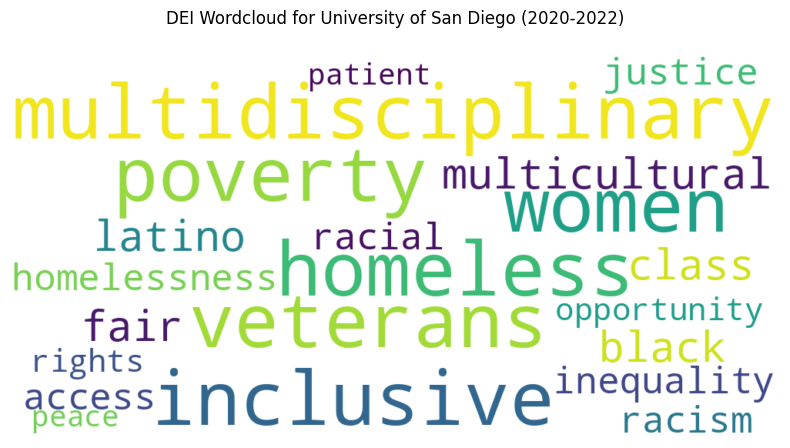

In [35]:
frequent_words = create_wordcloud_by_years(data, 
                                           2020, 2022, 
                                           stop_words, 
                                           dei_keywords, 
                                           'University of San Diego',
                                           min_freq=1, 
                                           max_freq=1000, 
                                           max_words=200)

In [36]:
print(frequent_words)

{'just': 5, 'fair': 3, 'class': 3, 'multicultural': 2, 'racism': 2, 'racial': 2, 'justice': 2, 'multidisciplinary': 1, 'inclusive': 1, 'homeless': 1, 'veterans': 1, 'poverty': 1, 'women': 1, 'black': 1, 'latino': 1, 'homelessness': 1, 'access': 1, 'inequality': 1, 'opportunity': 1, 'rights': 1, 'patient': 1, 'peace': 1}


## Wordclouds by Accounts

In [37]:
directory_main = '/kaggle/input/tweets-500/Tweets'
directory_engg = '/kaggle/input/engineering-tweets-dataset/Output Data [Engineering]/Output Data [Engineering]'
directory_business = '/kaggle/input/tweet-business-schools/Output Data [Business]'
directory_law = '/kaggle/input/tweet-law-schools/Output Data [Law]'
directory_med = '/kaggle/input/tweet-med-schools/Output Data [Med]'

In [38]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_tweets_vectorized(df, text_column='Tweet'):
    """
    Optimized vectorized preprocessing for tweets in a pandas DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing the tweets.
        text_column (str): Column name containing the tweets.
    Returns:
        pd.Series: Processed tweets as a pandas Series.
    """
    # Step 1: Lowercase the tweets
    df[text_column] = df[text_column].str.lower()

    # Step 2: Remove URLs
    url_pattern = r'https?://\S+|www\.\S+'
    df[text_column] = df[text_column].str.replace(url_pattern, '', regex=True)

    # Step 3: Remove mentions
    mention_pattern = r'@\w+'
    df[text_column] = df[text_column].str.replace(mention_pattern, '', regex=True)

    # Step 4: Remove emojis
    emoji_pattern = (
        r"["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+"
    )
    df[text_column] = df[text_column].str.replace(emoji_pattern, '', regex=True)

    # Step 5: Remove special characters and punctuation
    special_char_pattern = r'[^\w\s]'
    df[text_column] = df[text_column].str.replace(special_char_pattern, '', regex=True)

    # Step 6: Remove numbers
    df[text_column] = df[text_column].str.replace(r'\d+', '', regex=True)

    # Step 7: Remove extra whitespaces
    df[text_column] = df[text_column].str.replace(r'\s+', ' ', regex=True).str.strip()
    
    '''
    # Step 8: Remove stopwords and unwanted words
    df[text_column] = df[text_column].apply(
        lambda x: ' '.join(word for word in x.split() if word not in STOPWORDS and word not in UNWANTED_WORDS)
    )
    
    # Step 9: Lemmatize words
    df[text_column] = df[text_column].apply(
        lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split())
    )
    '''
    return df[text_column]


In [39]:
def process_csv_in_batches(file_path, chunk_size=10000, text_column='Tweet', processed_column='Processed Tweet'):
    """
    Process a CSV file in batches, applying preprocessing to each batch, and saving the results in a new column.
    
    Args:
        file_path (str): Path to the CSV file.
        chunk_size (int): The number of rows to process at a time.
        text_column (str): Column name containing the tweets.
        processed_column (str): Column name where processed tweets will be stored.
    
    Returns:
        pd.DataFrame: Processed dataframe with tweets.
    """
    # Initialize an empty list to store processed chunks
    processed_chunks = []
    
    # Read CSV file in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Preprocess tweets and store them in the 'Processed Tweet' column
        chunk[processed_column] = preprocess_tweets_vectorized(chunk, text_column)
        # Append the processed chunk to the list
        processed_chunks.append(chunk)
    
    # Concatenate all processed chunks into a single DataFrame
    processed_df = pd.concat(processed_chunks, axis=0, ignore_index=True)
    
    return processed_df

In [40]:
def create_dataset(directory, chunk_size=10000, text_column='Tweet', processed_column='Processed Tweet'):
    """
    Create a dataset from CSV files in a directory, processing each in batches and saving the result in a new column.
    
    Args:
        directory (str): Directory containing the CSV files.
        chunk_size (int): The number of rows to process at a time.
        text_column (str): Column name containing the tweets.
        processed_column (str): Column name where processed tweets will be stored.
    
    Returns:
        pd.DataFrame: Combined DataFrame with processed tweets from all CSV files in the directory.
    """
    # Initialize an empty list to store processed dataframes
    all_df_list = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Process each file in batches and save processed tweets in a new column
        processed_df = process_csv_in_batches(file_path, chunk_size, text_column, processed_column)
        
        # Append the processed dataframe to the list
        all_df_list.append(processed_df)
    
    # Concatenate all processed dataframes into a single DataFrame
    final_df = pd.concat(all_df_list, axis=0, ignore_index=True)
    
    return final_df


In [41]:
tweets_main = create_dataset(directory_main)
tweets_engg = create_dataset(directory_engg)
tweets_business = create_dataset(directory_business)
tweets_law = create_dataset(directory_law)
tweets_med = create_dataset(directory_med)

In [42]:
tweets = pd.concat([tweets_main, tweets_engg, tweets_business, tweets_law, tweets_med], axis = 0, ignore_index = True)

In [43]:
tweets.columns

Index(['TweetID', 'Date', 'Username', 'UserID', 'Tweet', 'LikeCount',
       'RetweetCount', 'RetweetFrom', 'UniSerial', 'University', 'USNewsRank',
       'MainHandle', 'BusinessSchool', 'MedSchool', 'LawSchool', 'EECSSchool',
       'EnggSchool', 'NationalUni', 'LibArtCollege', 'RegionalUni',
       'Processed Tweet'],
      dtype='object')

In [44]:
# Convert the 'Date' column to datetime and extract the year
dataframes = [tweets, tweets_main, tweets_engg, tweets_business, tweets_law, tweets_med]

for df in dataframes:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year

In [45]:
def create_wordcloud(processed_tweets, CUSTOM_STOPWORDS, account_type=None, max_words=100):
    # Limit the amount of text processed for faster computation
    all_tweets = ' '.join(processed_tweets.sample(min(10000, len(processed_tweets))).astype(str).tolist())  # Use a sample of tweets
    
    # Generate word cloud with speed-optimizing parameters
    wordcloud = WordCloud(
        stopwords = CUSTOM_STOPWORDS,
        width=800, height=400, 
        background_color='white', 
        colormap='cool',
        max_words=max_words  # Limit the number of words for faster rendering
    ).generate(all_tweets)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    if account_type:
        plt.title(f'Wordcloud for {account_type} Accounts', fontsize=16)
    
    plt.show()

In [46]:
UNWANTED_WORDS = {

"students", "law", "yale", "week", "recent", "report", "book", "state",
"learn", "clinic", "prison", "supreme", "court", "future", "public", "today", "discusses", "school", "yls", "via", "work", "amp", "legal", "write", "talk", "read", "mfiaclinic", "watech", "scotus", "discuss",
"watch", "community", "talks", "case", "prof", "yaleisp", "right", "policy", "justice", "campus", "new", "thank", "student", "year", "dr","college", "day", "u", "president", "education", "team", "say", "university", "welcome", "professor", "event", "graduate", "pm", "rt", "thank", "college", "campus", "new", "today", "university", "game", "team", "info","dr", "professor", "classes", "research", "video", "photo", "story", "tomorrow","congrats", "congratulations", "president", "award", "event", "summer", "fall","live", "tonight", "best", "good", "great", "help", "world", "time", "way", "know", "see", "check", "get", "make", "take", "need", "want", "look", "like", "love", "happy", "excited", "hope", "enjoy", "well", "free"


}

In [47]:
CUSTOM_STOPWORDS = set(stopwords.words('english')) | UNWANTED_WORDS

In [48]:
frequent_words_main = create_wordcloud_by_years(tweets,2020, 2022, stop_words, min_freq=1, max_freq=500, max_words=200)

TypeError: create_wordcloud_by_years() missing 2 required positional arguments: 'dei_keywords' and 'university_name'

In [ ]:
print(frequent_words_main)

In [ ]:
create_wordcloud(tweets_main['Processed Tweet'], CUSTOM_STOPWORDS, account_type = 'Main')

In [ ]:
create_wordcloud(tweets_business['Processed Tweet'], account_type = 'Business')

In [ ]:
create_wordcloud(tweets_law['Processed Tweet'], stop_words, account_type = 'Law')

In [ ]:
create_wordcloud(tweets_med['Processed Tweet'], account_type = 'Medical')

In [ ]:
create_wordcloud(tweets_engg['Processed Tweet'], account_type = 'Engineering')